In [1]:
from pathlib import Path
from pyexplain.benchmark.file_utils import *
from pyexplain.benchmark.plot import *
import IPython
import numpy as np
import pandas as pd
import matplotlib
from collections import Counter
pd.set_option('display.max_rows', 100)

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.weight']= 'bold'

In [2]:
# MAC
environment = 'MAC'
BASE_MAC_LINUX = {
    'MAC': '/Users/emiliogamba/Documents/01_VUB/01_Research/01_Shared_Projects',
    'LINUX': '/home/emilio/research/'
}

PATH_FIGURES_POST_PAPER = Path(BASE_MAC_LINUX[environment] + "01_holygrail/latex/journal/jair21/figures/")
EXPERIMENT_RESULTS = Path(BASE_MAC_LINUX[environment] + "06_HPC_Experiments/experiments/data/output/")
BASE_OUTPUT_PATH = BASE_MAC_LINUX[environment] + "/06_HPC_Experiments/experiments/data/output/"
REMOTE_EXPERIMENT_RESULTS = "/data/brussel/101/vsc10143/hpc_experiments2/experiments/data/output/"

Research QUestions:
-------------------------

Q1 What is the effect of requiring optimality of the generated MUSs on the quality of the generate explanations ?

Q2 Does re-use of information across the different iterations improve efficiency?

Q3 Which domain-specific Correction Subset method improves the overall runtime?

    (a) How does extraction multiple correction subsets affect runtime ?

Q4 What is the efficiency of a single step O(C)US and is single step sufficiently efficient for an interactive context? 

    (a) From an incremental (random explanation?) solving point of view ?
    (b) From an instantaneous(time-to-first) explanation point of view ?

## (RQ2)  Does re-use of information across the different iterations improve efficiency?


Checking if Incrementality helps in improving explanation sequence generation 

Results are:
    
    # Demystify puzzles
    "RQ3_DEMYSTIFY_PUZZLES/2022021717/"
    "RQ3_LOGIC_SUDOKU_PUZZLES/2022021717/",
    "MUS/2022022111"

In [3]:
all_sat_folders = [
    "RQ3_DEMYSTIFY_PUZZLES/2022021717/",
    "RQ3_DEMYSTIFY_PUZZLES/2022030117/",
    "RQ3_LOGIC_SUDOKU_PUZZLES/2022021717/",
    "MUS/2022030116"
]

path_sat_output_dirs = [BASE_OUTPUT_PATH + o for o in all_sat_folders]

df_all_sat = folder_to_pandas_df_pickle(path_sat_output_dirs)

df_all_sat = df_all_sat[~df_all_sat["params_instance"].isin([
#     "origin_origin.param_0_origin.param.json",
#     "pasta_pasta.param_0_pasta.param.json"
])]

df_sat_ignored_instances = corr_enhance_df(df_all_sat)

renaming_expl_config = {
    "MUS": "MUS",
    "OCUS":"OCUS+Incr. HS",
    "OCUS_NOT_INCREMENTAL":"OCUS",
    "OUS_INCREMENTAL_NAIVE":"OUSb+Lit. Incr. HS",
    "OUS_INCREMENTAL_NAIVE_PARALLEL": "OUS Iter.+Lit. Incr. HS",
    "OUS_NAIVE_PARALLEL":"OUS Iter.",
    "OUS_SS": "OUSb"
}
df_sat_ignored_instances["explanation config"] = df_sat_ignored_instances.apply(lambda row: renaming_expl_config[row["params_explanation_computer"]], axis=1)
df_sat_ignored_instances["HS"] = df_sat_ignored_instances.apply(lambda row: row["tot_n_hs"], axis=1)
display(df_sat_ignored_instances.groupby(by=["explanation config"]).count())


/home/emilio/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/emilio/.local/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,time_totalTime,time_timeout,time_timedout,time_explain,time_cumul_explain,time_preprocess,time_opt,time_sat,time_grow,time_disj_mcs,...,avg_n_hs_disj_mcs,renamed_explanation_config,avg_t_explain,max_t_explain,min_t_explain,n_expls,%time_remaining_ocus,corr_explanation_config,incremental,HS
explanation config,,,,,,,,,,,,,,,,,,,,,
MUS,403,403,403,403,403,403,403,403,403,403,...,403,403,389,403,403,403,403,403,403,403
OCUS,403,403,403,403,403,403,403,403,403,403,...,403,403,399,403,403,403,403,403,403,403
OCUS+Incr. HS,403,403,403,403,403,403,403,403,403,403,...,403,403,397,403,403,403,403,403,403,403
OUS Iter.,403,403,403,403,403,403,403,403,403,403,...,403,403,403,403,403,403,403,403,403,403
OUS Iter.+Lit. Incr. HS,403,403,403,403,403,403,403,403,403,403,...,403,403,402,403,403,403,403,403,403,403
OUSb,403,403,403,403,403,403,403,403,403,403,...,403,403,315,403,403,403,403,403,403,403
OUSb+Lit. Incr. HS,403,403,403,403,403,403,403,403,403,403,...,403,403,315,403,403,403,403,403,403,403


In [15]:
df_sat_ignored_instances.groupby(by=["explanation config", "params_grow_config"]).count()

,,time_totalTime,time_timeout,time_timedout,time_explain,time_cumul_explain,time_preprocess,time_opt,time_sat,time_grow,time_disj_mcs,...,renamed_explanation_config,avg_t_explain,max_t_explain,min_t_explain,n_expls,%time_remaining_ocus,corr_explanation_config,incremental,HS,steps_till_timeout
explanation config,params_grow_config,,,,,,,,,,,,,,,,,,,,,
MUS,No Grow,403,403,403,403,403,403,403,403,403,403,...,403,389,403,403,403,403,403,403,403,403
OCUS,SAT,403,403,403,403,403,403,403,403,403,403,...,403,399,403,403,403,403,403,403,403,403
OCUS+Incr. HS,SAT,403,403,403,403,403,403,403,403,403,403,...,403,397,403,403,403,403,403,403,403,403
OUS Iter.,SAT,403,403,403,403,403,403,403,403,403,403,...,403,403,403,403,403,403,403,403,403,403
OUS Iter.+Lit. Incr. HS,SAT,403,403,403,403,403,403,403,403,403,403,...,403,402,403,403,403,403,403,403,403,403
OUSb,SAT,403,403,403,403,403,403,403,403,403,403,...,403,315,403,403,403,403,403,403,403,403
OUSb+Lit. Incr. HS,SAT,403,403,403,403,403,403,403,403,403,403,...,403,315,403,403,403,403,403,403,403,403


In [4]:
for l in df_sat_ignored_instances[df_sat_ignored_instances["params_instance"].isin([
    "origin_origin.param_0_origin.param.json",
    "pasta_pasta.param_0_pasta.param.json"
])]["params_output"].to_list():
    if '2022021717/' in l:
        lr = l.replace(
            "/data/brussel/101/vsc10143/",
            "/home/emilio/research/"
        )
        print(f'rm {lr}')

In [5]:
display(set(df_sat_ignored_instances["params_grow"]))

{'SAT', 'ignore'}

In [6]:
for id, row in df_sat_ignored_instances.groupby(by=["params_instance"]).count().iterrows():
    #print(row["time_totalTime"])
    if row["time_totalTime"] != 7:
        #print(row["params_instance"])
        print(id, row)

In [7]:
def mean_ignore_zeros(x):
    l = [xi for xi in x if xi != 0 and xi != 0.0]
    #print(l)
    if len(l) == 0:
        return 0
    return sum(l)/len(l)

print(mean_ignore_zeros([3, 8, 0, 4, 5]))
print(mean_ignore_zeros([3, 8, 0.0, 4, 5]))
print(mean_ignore_zeros([3, 8, 0.0, 0, 4, 5]))

5.0
5.0
5.0


In [8]:
df_sat_grouped = df_sat_ignored_instances.groupby(by=["params_explanation_computer"]).agg(
    t=("tot_time_explain" , lambda x: round(mean_ignore_zeros(x), 2)),
    f=("time_timedout", lambda x: f"[{str(len(x) - np.sum(x)).zfill(3)} / {len(x)}]"),
    f2=("time_timedout", lambda x: f"{round((len(x) - np.sum(x))/len(x)*100)}%"),
    avg_opt=("%time_opt2" , lambda x: round(mean_ignore_zeros(x), 2)),
    std_opt=("%time_opt2" , lambda x: round(np.std(x), 2)),
    avg_sat=("%time_sat2" , lambda x: round(mean_ignore_zeros(x), 2)),
    std_sat=("%time_sat2" ,lambda x: round(np.std(x), 2)),
    avg_grow=("%time_grow2" , lambda x: round(mean_ignore_zeros(x), 2)),
    std_grow=("%time_grow2" , lambda x: round(np.std(x), 2)),
    avg_disj_mcs=("%time_disj_mcs2" , lambda x: round(mean_ignore_zeros(x), 2)),
    std_disj_mcs=("%time_disj_mcs2" , lambda x: round(np.std(x), 2)),
    avg_remaining=("%time_remaining2" , lambda x: round(mean_ignore_zeros(x), 2)),
    std_remaining=("%time_remaining2" , lambda x: round(np.std(x), 2)),
    sum_t_opt=("tot_time_opt" , lambda x: sum(x)),
    sum_t_sat=("tot_time_sat" , lambda x: sum(x)),
    sum_t_grow=("tot_time_grow" , lambda x: sum(x)),
    avg_n_opt=("tot_n_opt" , lambda x: round(mean_ignore_zeros(x))),
    avg_n_sat=("tot_n_sat" , lambda x: round(mean_ignore_zeros(x))),
    avg_n_grow=("tot_n_grow" , lambda x: round(mean_ignore_zeros(x))),
    tot_n_opt=("tot_n_opt" , lambda x: sum(x)),
    tot_n_sat=("tot_n_sat" , lambda x: sum(x)),
    tot_n_grow=("tot_n_grow" , lambda x: sum(x)),
    avg_n_hs=("tot_n_hs" , lambda x: round(mean_ignore_zeros(x))),
)

df_temp = df_sat_grouped.reset_index()
for k in ["opt", "sat", "grow", "disj_mcs", "remaining"]:
    df_temp[k] = df_temp.apply(lambda row: None, axis=1)
    df_temp["%"+k] = df_temp.apply(lambda row: None, axis=1)

df_temp["avg_t_opt"] = df_temp.apply(
    lambda row: round(row["sum_t_opt"]/row['tot_n_opt'], 4) if row["tot_n_opt"] !=0 else 0, axis=1)
df_temp["avg_t_sat"] = df_temp.apply(
    lambda row: round(row['sum_t_sat']/row['tot_n_sat']  if row["tot_n_sat"] !=0 else 0, 4), axis=1)
df_temp["avg_t_grow"] = df_temp.apply(
    lambda row: round(row['sum_t_grow']/row['tot_n_grow']  if row["tot_n_grow"] !=0 else 0, 4), axis=1)

for index,row in df_temp.iterrows():
    for k in ["opt", "sat", "grow", "disj_mcs", "remaining"]:
        df_temp.at[index,k]= f'{row["avg_"+k]}% [+/- {row["std_"+k]}%]'
        df_temp.at[index,"%"+k]= f'{row["avg_"+k]}%'

renaming_expl_config = {
    "MUS": "MUS",
    "OCUS":"OCUS+Incr. HS",
    "OCUS_NOT_INCREMENTAL":"OCUS",
    "OUS_INCREMENTAL_NAIVE":"OUSb+Lit. Incr. HS",
    "OUS_INCREMENTAL_NAIVE_PARALLEL": "OUS Iter.+Lit. Incr. HS",
    "OUS_NAIVE_PARALLEL":"OUS Iter.",
    "OUS_SS": "OUSb"
}
        
df_temp["expl_config"] = df_temp.apply(
    lambda row: renaming_expl_config[row['params_explanation_computer']], axis=1)

percentage_exec_time_ous = df_temp[
        df_temp["expl_config"] != "bla"
    ][
    ["expl_config",
     #"t",
     "f",
     "f2"
#      "%opt", 
#      "%sat", 
#      "%grow", 
#      #"%remaining",
#      "avg_n_hs"
     #'avg_t_opt', 
     #'avg_n_opt', 
     #'avg_t_sat',
     #'avg_n_sat', 
     #'avg_t_grow',
     #'avg_n_grow'
    ]].sort_values(["expl_config"], ascending=[False])
display(percentage_exec_time_ous)
print(percentage_exec_time_ous.to_latex(index=False))

# df_sat_ignored_instances.groupby(by=["params_explanation_computer"]).sum()

,expl_config,f,f2
3,OUSb+Lit. Incr. HS,[233 / 403],58%
6,OUSb,[229 / 403],57%
4,OUS Iter.+Lit. Incr. HS,[272 / 403],67%
5,OUS Iter.,[273 / 403],68%
1,OCUS+Incr. HS,[242 / 403],60%
2,OCUS,[233 / 403],58%
0,MUS,[311 / 403],77%


\begin{tabular}{lll}
\toprule
            expl\_config &           f &  f2 \\
\midrule
     OUSb+Lit. Incr. HS & [233 / 403] & 58\% \\
                   OUSb & [229 / 403] & 57\% \\
OUS Iter.+Lit. Incr. HS & [272 / 403] & 67\% \\
              OUS Iter. & [273 / 403] & 68\% \\
          OCUS+Incr. HS & [242 / 403] & 60\% \\
                   OCUS & [233 / 403] & 58\% \\
                    MUS & [311 / 403] & 77\% \\
\bottomrule
\end{tabular}



In [9]:
df_sat_grouped = df_sat_ignored_instances.groupby(by=["params_instance"]).sum()
df_sat_non_timedout_instances = df_sat_grouped[df_sat_grouped["time_timedout"] == 0].reset_index()
non_timedout_instances = df_sat_non_timedout_instances.params_instance.to_list()

df_sat_non_timeout_instances = df_sat_ignored_instances[
    (df_sat_ignored_instances["time_timedout"] == 0)
]
display(df_sat_non_timeout_instances.groupby(by=["params_instance"]).count())
df_sat_grouped = df_sat_non_timeout_instances.groupby(by=["params_explanation_computer"]).agg(
    t=("tot_time_explain" , lambda x: round(mean_ignore_zeros(x), 2)),
    f=("time_timedout", lambda x: f"[{str(len(x) - np.sum(x)).zfill(3)} / {len(x)}]"),
    avg_opt=("%time_opt2" , lambda x: round(mean_ignore_zeros(x), 2)),
    std_opt=("%time_opt2" , lambda x: round(np.std(x), 2)),
    avg_sat=("%time_sat2" , lambda x: round(mean_ignore_zeros(x), 2)),
    std_sat=("%time_sat2" ,lambda x: round(np.std(x), 2)),
    avg_grow=("%time_grow2" , lambda x: round(mean_ignore_zeros(x), 2)),
    std_grow=("%time_grow2" , lambda x: round(np.std(x), 2)),
    avg_disj_mcs=("%time_disj_mcs2" , lambda x: round(mean_ignore_zeros(x), 2)),
    std_disj_mcs=("%time_disj_mcs2" , lambda x: round(np.std(x), 2)),
    avg_remaining=("%time_remaining2" , lambda x: round(mean_ignore_zeros(x), 2)),
    std_remaining=("%time_remaining2" , lambda x: round(np.std(x), 2)),
    sum_t_opt=("tot_time_opt" , lambda x: sum(x)),
    sum_t_sat=("tot_time_sat" , lambda x: sum(x)),
    sum_t_grow=("tot_time_grow" , lambda x: sum(x)),
    avg_n_opt=("tot_n_opt" , lambda x: round(mean_ignore_zeros(x))),
    avg_n_sat=("tot_n_sat" , lambda x: round(mean_ignore_zeros(x))),
    avg_n_grow=("tot_n_grow" , lambda x: round(mean_ignore_zeros(x))),
    tot_n_opt=("tot_n_opt" , lambda x: sum(x)),
    tot_n_sat=("tot_n_sat" , lambda x: sum(x)),
    tot_n_grow=("tot_n_grow" , lambda x: sum(x)),
    avg_n_hs=("tot_n_hs" , lambda x: round(mean_ignore_zeros(x))),
)

df_temp = df_sat_grouped.reset_index()
for k in ["opt", "sat", "grow", "disj_mcs", "remaining"]:
    df_temp[k] = df_temp.apply(lambda row: None, axis=1)
    df_temp["%"+k] = df_temp.apply(lambda row: None, axis=1)

df_temp["avg_t_opt"] = df_temp.apply(
    lambda row: round(row["sum_t_opt"]/row['tot_n_opt'], 4) if row["tot_n_opt"] !=0 else 0, axis=1)
df_temp["avg_t_sat"] = df_temp.apply(
    lambda row: round(row['sum_t_sat']/row['tot_n_sat']  if row["tot_n_sat"] !=0 else 0, 4), axis=1)
df_temp["avg_t_grow"] = df_temp.apply(
    lambda row: round(row['sum_t_grow']/row['tot_n_grow']  if row["tot_n_grow"] !=0 else 0, 4), axis=1)

for index,row in df_temp.iterrows():
    for k in ["opt", "sat", "grow", "disj_mcs", "remaining"]:
        df_temp.at[index,k]= f'{row["avg_"+k]}% [+/- {row["std_"+k]}%]'
        df_temp.at[index,"%"+k]= f'{row["avg_"+k]}%'

renaming_expl_config = {
    "MUS": "MUS",
    "OCUS":"OCUS+Incr. HS",
    "OCUS_NOT_INCREMENTAL":"OCUS",
    "OUS_INCREMENTAL_NAIVE":"OUSb+Lit. Incr. HS",
    "OUS_INCREMENTAL_NAIVE_PARALLEL": "OUS Iter.+Lit. Incr. HS",
    "OUS_NAIVE_PARALLEL":"OUS Iter.",
    "OUS_SS": "OUSb"
}
        
df_temp["expl_config"] = df_temp.apply(
    lambda row: renaming_expl_config[row['params_explanation_computer']], axis=1)

percentage_exec_time_ous = df_temp[
        df_temp["expl_config"] != "bla"
    ][
    ["expl_config",
#      "t",
#      "f",
     "%opt", 
     "%sat", 
     "%grow", 
     #"%remaining",
     "avg_n_hs"
     #'avg_t_opt', 
     #'avg_n_opt', 
     #'avg_t_sat',
     #'avg_n_sat', 
     #'avg_t_grow',
     #'avg_n_grow'
    ]].sort_values(["expl_config"], ascending=[False])
display(percentage_exec_time_ous)
print(percentage_exec_time_ous.to_latex(index=False))

,time_totalTime,time_timeout,time_timedout,time_explain,time_cumul_explain,time_preprocess,time_opt,time_sat,time_grow,time_disj_mcs,...,renamed_explanation_config,avg_t_explain,max_t_explain,min_t_explain,n_expls,%time_remaining_ocus,corr_explanation_config,incremental,explanation config,HS
params_instance,,,,,,,,,,,,,,,,,,,,,
binairo_binairo_100_40.param.json,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
binairo_binairo_101_34.param.json,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
binairo_binairo_102_10.param.json,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
binairo_binairo_103_12.param.json,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
binairo_binairo_104_36.param.json,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tents_tents_0_tectonic-8.param.json,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
tents_tents_1_tectonic-9.param.json,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
tents_tents_2_tents-1.param.json,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


,expl_config,%opt,%sat,%grow,avg_n_hs
3,OUSb+Lit. Incr. HS,95.95%,3.94%,0.1%,1538
6,OUSb,86.86%,12.31%,0.83%,14795
4,OUS Iter.+Lit. Incr. HS,96.28%,3.42%,0.3%,1713
5,OUS Iter.,88.58%,10.41%,1.01%,15595
1,OCUS+Incr. HS,99.16%,0.78%,0.06%,405
2,OCUS,96.65%,3.01%,0.35%,6245
0,MUS,0.0%,0.0%,0.0%,0


\begin{tabular}{llllr}
\toprule
            expl\_config &   \%opt &   \%sat & \%grow &  avg\_n\_hs \\
\midrule
     OUSb+Lit. Incr. HS & 95.95\% &  3.94\% &  0.1\% &      1538 \\
                   OUSb & 86.86\% & 12.31\% & 0.83\% &     14795 \\
OUS Iter.+Lit. Incr. HS & 96.28\% &  3.42\% &  0.3\% &      1713 \\
              OUS Iter. & 88.58\% & 10.41\% & 1.01\% &     15595 \\
          OCUS+Incr. HS & 99.16\% &  0.78\% & 0.06\% &       405 \\
                   OCUS & 96.65\% &  3.01\% & 0.35\% &      6245 \\
                    MUS &   0.0\% &   0.0\% &  0.0\% &         0 \\
\bottomrule
\end{tabular}



In [10]:
set(df_sat_ignored_instances["corr_explanation_config"])

{'Greedy OUS+Incr.+SAT',
 'Iterated OUS+Incr.+SAT',
 'Iterated OUS+SAT',
 'MUS',
 'OCUS+Incr.+SAT',
 'OCUS+SAT',
 'OUS+Subsets+SAT'}

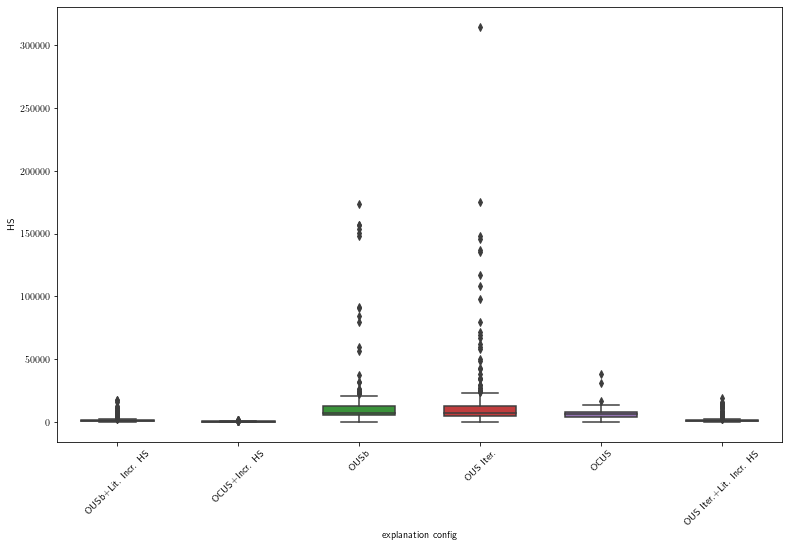

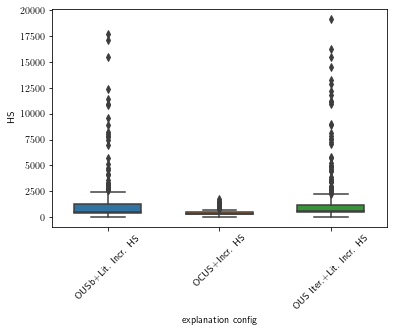

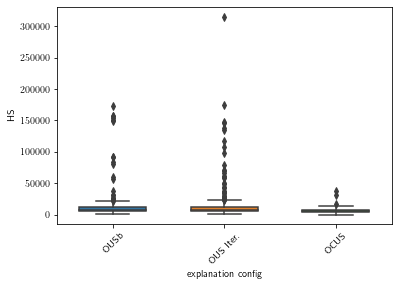

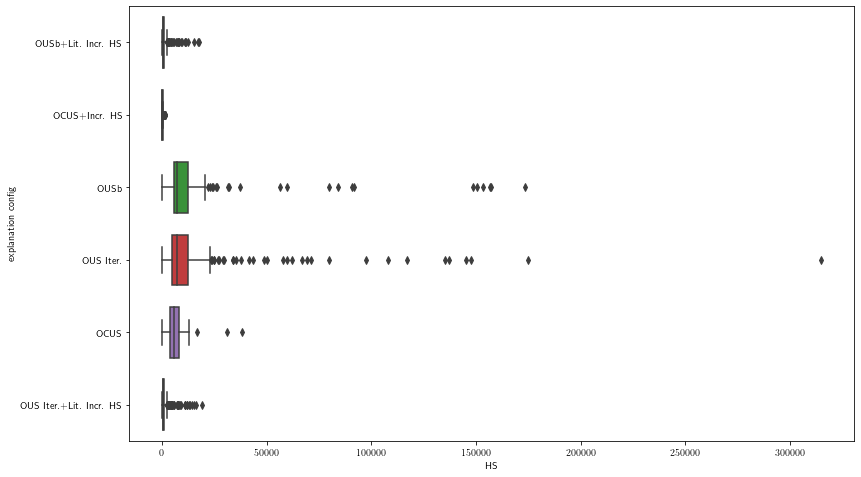

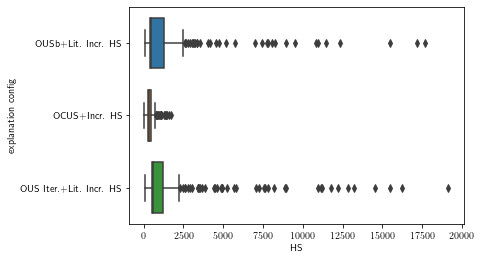

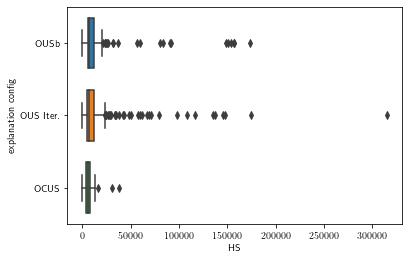

In [11]:
# library & dataset
import seaborn as sns
width= 0.6

df_sat_non_timeout_instances = df_sat_non_timeout_instances[
        (~df_sat_non_timeout_instances["explanation config"].str.contains("MUS"))
]

incr = df_sat_non_timeout_instances[df_sat_non_timeout_instances["explanation config"].str.contains("Incr")]
non_incr = df_sat_non_timeout_instances[
    (~df_sat_non_timeout_instances["explanation config"].str.contains("Incr")) &
        (~df_sat_non_timeout_instances["explanation config"].str.contains("MUS"))
]

plt.figure(figsize=(13,8))
ax = sns.boxplot( x=df_sat_non_timeout_instances["explanation config"], y=df_sat_non_timeout_instances["HS"], width=width )
plt.setp(ax.get_xticklabels(), rotation=45)
plt.savefig(PATH_FIGURES_POST_PAPER / datetime.now().strftime(f"rq2_hittingsets_r_%Y_%m_%d.pdf"))

plt.figure() # this clears the figure
ax = sns.boxplot( x=incr["explanation config"], y=incr["HS"], width=width)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.savefig(PATH_FIGURES_POST_PAPER / datetime.now().strftime(f"rq2_hittingsets_incremental_r_%Y_%m_%d.pdf"))

plt.figure() # this clears the figure
ax = sns.boxplot( x=non_incr["explanation config"], y=non_incr["HS"], width=width)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.savefig(PATH_FIGURES_POST_PAPER / datetime.now().strftime(f"rq2_hittingsets_not_incremental_R_%Y_%m_%d.pdf"))


plt.figure(figsize=(13,8))
sns.boxplot( y=df_sat_non_timeout_instances["explanation config"], x=df_sat_non_timeout_instances["HS"], width=0.7, orient="h", )
plt.savefig(PATH_FIGURES_POST_PAPER / datetime.now().strftime(f"rq2_hittingsets_incremental_%Y_%m_%d.pdf"))

plt.figure() # this clears the figure
sns.boxplot( y=incr["explanation config"], x=incr["HS"], width=0.7, orient="h", )
plt.savefig(PATH_FIGURES_POST_PAPER / datetime.now().strftime(f"rq2_hittingsets_incremental_%Y_%m_%d.pdf"))

plt.figure() # this clears the figure
sns.boxplot( y=non_incr["explanation config"], x=non_incr["HS"], width=0.7, orient="h" )
plt.savefig(PATH_FIGURES_POST_PAPER / datetime.now().strftime(f"rq2_hittingsets_not_incremental_%Y_%m_%d.pdf"))

Check if the data is correctly generated (all configs have been executed with all configurations)

## (RQ2)  Does re-use of information across the different iterations improve efficiency?

saving to path= /home/emilio/research/holygrail/latex/journal/jair21/figures/rq2_incrementality_2022_04_05.pdf


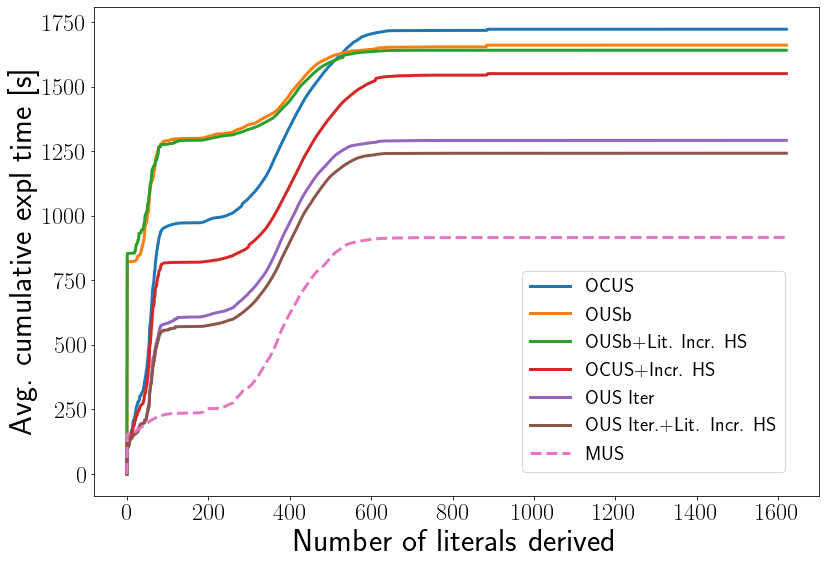

saving to path= /home/emilio/research/holygrail/latex/journal/jair21/figures/rq2_incrementality_zoom_2022_04_05.pdf


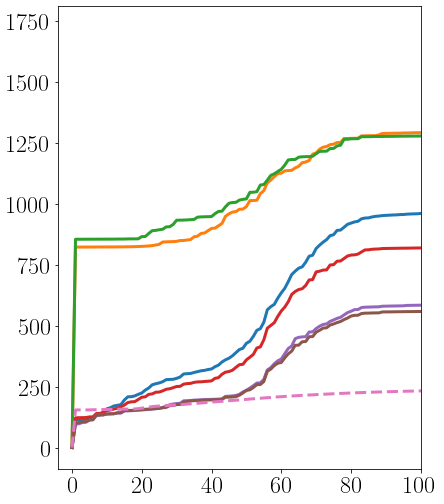

In [12]:
mapping_expl_config = {
    'OCUS': 'OCUS+Incr. HS',
    'OCUS_NOT_INCREMENTAL': 'OCUS',
    'OUS_INCREMENTAL_NAIVE': 'OUSb+Lit. Incr. HS',
    'OUS_INCREMENTAL_NAIVE_PARALLEL': 'OUS Iter.+Lit. Incr. HS',
    'OUS_NAIVE_PARALLEL': 'OUS Iter',
    'OUS_SS' : 'OUSb',
    'MUS': 'MUS'
}

d_cumul_avg_time_incr, ordering = summarize_cumalitve_lits_derived_time(df_sat_ignored_instances, column_name="params_explanation_computer", ignored=[])
    #renamed_ordering = [grow_renamed[o] for o in ordering]
#     ordering = 
plot_derived_lits_avg_time(
    d_cumul_avg_time_incr, 
    ordering=ordering,
    mapping=mapping_expl_config,
    figsize=(13, 9), 
    #with_line = 3600,
    #ylim = (-10, 900),
    loc=(0.59, 0.05),
    #next_to_graph=True,
    figure_path=PATH_FIGURES_POST_PAPER / datetime.now().strftime(f"rq2_incrementality_%Y_%m_%d.pdf"),
)

plot_derived_lits_avg_time(
    d_cumul_avg_time_incr, 
    ordering=ordering,
    mapping=mapping_expl_config,
    figsize=(6.5, 8.5), 
    #ylim = (-10, 900),
    no_legend=True,
    #with_line = 3600,
    xlimit = (-4, 100),
    #loc=(0.23, 0.05),
    #next_to_graph=True,
    figure_path=PATH_FIGURES_POST_PAPER / datetime.now().strftime(f"rq2_incrementality_zoom_%Y_%m_%d.pdf"),
)

### Checking the number of steps until a timeout for configurations that have timedout

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 41, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 41, 21, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 41, 1, 21, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 21, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 21, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 21, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 41, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 41, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 21, 1, 1, 1, 21, 21, 41, 1, 1, 1, 1, 1, 41, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 21, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

(array([1013.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,   32.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,   19.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,   32.,  693.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           4.]),
 array([  1. ,   2.2,   3.4,   4.6,   5.8,   7. ,   8.2,   9.4,  10.6,
         11.8,  13. ,  14.2,  15.4,  16.6,  17.8,  19. ,  20.2,  21.4,
         22.6,  23.8,  25. ,  26.2,  27.4,  28.6,  29.8,  31

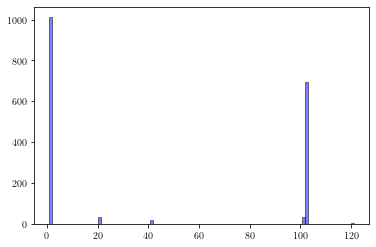

In [13]:
x = [expl[0]['cost'] for expl in df_sat_ignored_instances[df_sat_ignored_instances["time_timedout"] == 0]["explanation"] if expl[0]["cost"] > 0]
print(x)
plt.hist(x, 100, facecolor='blue', alpha=0.5, edgecolor='black')

expl_config='OCUS'
4


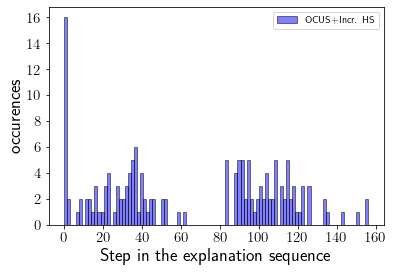

expl_config='OUS_SS'
51


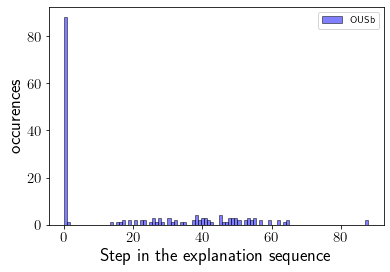

expl_config='MUS'
15


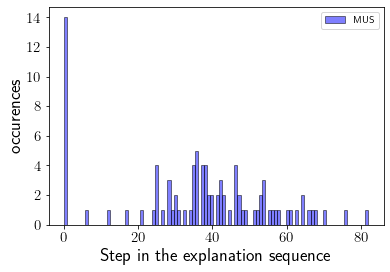

expl_config='OUS_INCREMENTAL_NAIVE'
52


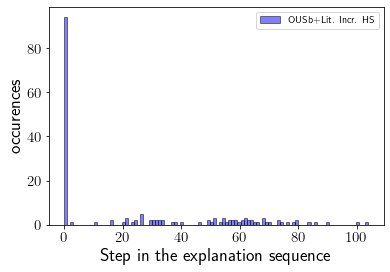

expl_config='OCUS_NOT_INCREMENTAL'
2


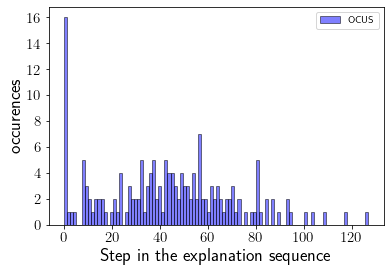

expl_config='OUS_NAIVE_PARALLEL'
0


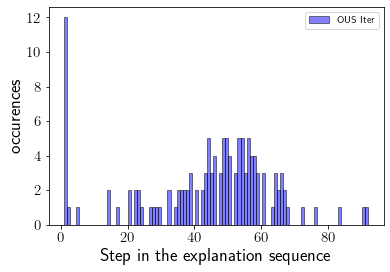

expl_config='OUS_INCREMENTAL_NAIVE_PARALLEL'
1


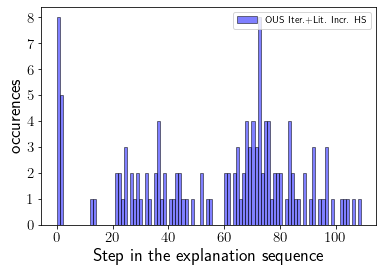

In [14]:
df_sat_ignored_instances["steps_till_timeout"] = df_sat_ignored_instances.apply(
    lambda row: len(row["explanation"]) if row["time_timedout"] else 0, 
    axis=1
)

for expl_config in set(df_sat_ignored_instances.params_explanation_computer):
    print(f"{expl_config=}")
    x = df_sat_ignored_instances[
        df_sat_ignored_instances["time_timedout"] & 
        (df_sat_ignored_instances["params_explanation_computer"] == expl_config)
    ][
        "steps_till_timeout"
    ]
    
    print(round(Counter(x)[0]/len(x)*100))
    n, bins, patches = plt.hist(x, 100, facecolor='blue', alpha=0.5, edgecolor='black', label=mapping_expl_config[expl_config])
    plt.legend()
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('Step in the explanation sequence', fontsize=18)
    plt.ylabel('occurences', fontsize=18)

    plt.savefig(
        PATH_FIGURES_POST_PAPER / datetime.now().strftime(f"rq2_histogram_{expl_config}_%Y_%m_%d.pdf"),
        bbox_inches='tight'
    )
    plt.show()
